## Solid Earth tides - map and variation of acquisition time

In [1]:
%matplotlib inline
import os
import datetime as dt
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt, ticker, dates as mdates
import pysolid
from mintpy.utils import readfile, utils as ut
plt.rcParams.update({'font.size': 12})

work_dir = os.path.expanduser('~/Papers/2021_Geolocation/figs_src')
os.chdir(work_dir)
print('Go to directory', work_dir)

Go to directory /Users/yunjunz/Papers/2021_Geolocation/figs_src


In [2]:
tide_vel = 400 / (12.4 * 3600)   # mm/s
t_span = 1000e3 / 6e3
print('up SET difference: {:.1f} mm'.format(t_span * tide_vel))

up SET difference: 1.5 mm


In [6]:
az_angle

-103.07204886822507

In [3]:
fname = '/Users/yunjunz/data/offset4motion/SaltonSeaSenDT173/mintpy_offset_v2/timeseriesRg.h5'
meta = readfile.read_attribute(fname)
meta['LENGTH'] = int(meta['LENGTH']) * 5
inc_angle = ut.incidence_angle(meta)
az_angle = ut.heading2azimuth_angle(float(meta['HEADING']))

near   incidence angle : 30.6236 degree
center incidence angle : 38.2582 degree
far    incidence angle : 45.8929 degree


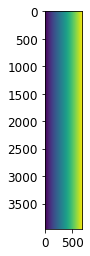

In [4]:
plt.figure()
plt.imshow(inc_angle)
plt.show()

In [12]:
lalos = [
    [32.30, -120.53],
    [32.70, -117.89],
    [52.82, -126.04],
    [53.22, -122.34],
]

#inc_angle = (30.6 + 45.9) / 2
inc_angle_file = os.path.join(work_dir, 'SET/incAngle.geo')
inc_angle, atr = readfile.read(inc_angle_file)
inc_angle[inc_angle == 0] = np.nan
inc_angle_mean = np.nanmean(inc_angle)
az_angle = 102


# inputs
dt_obj0 = dt.datetime(2019, 5, 16, 1, 57, 41)
dt_obj1 = dt.datetime(2019, 5, 16, 2,  3, 23)
#S, N, W, E = 32.0, 53.5, -126.5, -117.5
#y_step, x_step = -0.1, 0.1
#length = int((S - N) / y_step)
#width = int((E - W) / x_step)
#atr = {
#    'LENGTH'  : length,
#    'WIDTH'   : width,
#    'X_FIRST' : W,
#    'Y_FIRST' : N,
#    'X_STEP'  : x_step,
#    'Y_STEP'  : y_step,
#}

(tide_e,
 tide_n,
 tide_u) = pysolid.calc_solid_earth_tides_grid(dt_obj0, atr,
                                               display=False,
                                               verbose=True)
tide_los = ut.enu2los(tide_e, tide_n, tide_u, inc_angle=inc_angle, az_angle=az_angle)

PYSOLID: ----------------------------------------
PYSOLID: datetime: 2019-05-16T01:57:41
PYSOLID: SNWE: (32.501249999999985, 43.50124999999997, -123.50124999999974, -117.5012499999999)
SOLID  : calculate solid Earth tides in east/north/up direction
SOLID  : shape: (1320, 720), step size: -0.0083 by 0.0083 deg
SOLID  : calculating / writing data to txt file: /Users/yunjunz/Papers/2021_Geolocation/figs_src/solid.txt
PYSOLID: read data from text file: /Users/yunjunz/Papers/2021_Geolocation/figs_src/solid.txt


/Users/yunjunz/tools/MintPy/mintpy/utils/utils0.py:406: RuntimeWarning: invalid value encountered in cos
  + u * np.cos(inc_angle))


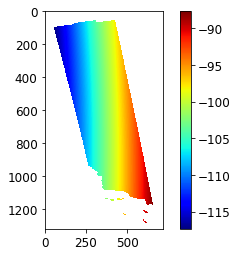

In [13]:
plt.figure()
plt.imshow(tide_los*1e3, cmap='jet', interpolation='nearest')
plt.colorbar()
plt.show()

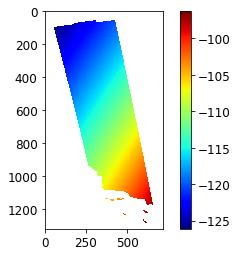

In [15]:
tide_los = ut.enu2los(tide_e, tide_n, tide_u, inc_angle=inc_angle, az_angle=np.nanmean(inc_angle))
plt.figure()
plt.imshow(tide_los*1e3, cmap='jet', interpolation='nearest')
plt.colorbar()
plt.show()